In [5]:
from sklearn.tree import DecisionTreeClassifier

import os
import pandas as pd
import numpy as np

path = r"/home/benjamin/Documents/Ensicaen/3A_riga/Cours/Telecom-software/Task 5/labeled_flows_xml"

# Initialize lists to store data
X_Normal = []
Y_Normal = []
X_Attack = []
Y_Attack = []

for file in os.listdir(path):
    full_path = os.path.join(path, file)

    # Skip empty files
    if os.path.getsize(full_path) == 0:
        print(f"Skipping empty file: {full_path}")
        continue

    try:
        # Attempt to read the XML file
        df = pd.read_xml(full_path)
        print(f"Successfully read file: {full_path}")
    except Exception as e:
        # Log the error and skip to the next file
        print(f"Error reading file {full_path}: {e}")
        continue

    # Proceed with analysis only if 'df' is successfully created
    if 'appName' in df.columns:
        app_count = pd.value_counts(df['appName'])
    else:
        print(f"'appName' column missing in file: {full_path}")
        continue

    # Proceed with the rest of the code, checking required columns
    if 'Tag' not in df.columns:
        print(f"'Tag' column missing in file: {full_path}")
        continue

    attack_count = pd.value_counts(df['Tag'])
    attack_dataframe = df.loc[df['Tag'] == 'Attack']

    if not all(col in attack_dataframe.columns for col in 
               ['totalSourceBytes', 'totalDestinationBytes', 
                'totalDestinationPackets', 'totalSourcePackets', 
                'sourcePort', 'destinationPort']):
        print(f"Missing necessary feature columns in file: {full_path}")
        continue


    normal_dataframe = df.loc[df['Tag'] == 'Normal']


    # Count appName occurrences in the Attack DataFrame
    attack_count2 = pd.value_counts(attack_dataframe['appName'])


    # Separate features (X) and labels (Y) for Attack and Normal data
    normal_dataframe_Y = normal_dataframe[['Tag']]
    attack_dataframe_Y = attack_dataframe[['Tag']]

    # Select feature columns
    attack_dataframe = attack_dataframe[['totalSourceBytes', 'totalDestinationBytes', 
                                        'totalDestinationPackets', 'totalSourcePackets', 'sourcePort', 'destinationPort']]
    normal_dataframe = normal_dataframe[['totalSourceBytes', 'totalDestinationBytes', 
                                        'totalDestinationPackets', 'totalSourcePackets', 'sourcePort', 'destinationPort']]

    # Append data to the lists
    X_Normal.append(normal_dataframe)
    Y_Normal.append(normal_dataframe_Y)
    X_Attack.append(attack_dataframe)
    Y_Attack.append(attack_dataframe_Y)

# Concatenate all collected data into single DataFrames
X_Normal = pd.concat(X_Normal, ignore_index=True)
Y_Normal = pd.concat(Y_Normal, ignore_index=True)
X_Attack = pd.concat(X_Attack, ignore_index=True)
Y_Attack = pd.concat(Y_Attack, ignore_index=True)

from sklearn.model_selection import train_test_split

X_train_N, X_test_N, Y_train_N, Y_test_N = train_test_split(X_Normal, Y_Normal, test_size=0.3, random_state=0)
X_train_A, X_test_A, Y_train_A, Y_test_A = train_test_split(X_Attack, Y_Attack, test_size=0.3, random_state=0)

X_train = pd.concat([X_train_N, X_train_A])
X_train = X_train.sample(frac=1, random_state=42)

X_test = pd.concat([X_test_N, X_test_A])
X_test = X_test.sample(frac=1, random_state=42)

Y_train = np.concatenate([Y_train_N, Y_train_A])
Y_train = pd.DataFrame(Y_train)
Y_train = Y_train.sample(frac=1, random_state=42)

Y_test = np.concatenate([Y_test_N, Y_test_A])
Y_test = pd.DataFrame(Y_test)
Y_test = Y_test.sample(frac=1, random_state=42)



Error reading file /home/benjamin/Documents/Ensicaen/3A_riga/Cours/Telecom-software/Task 5/labeled_flows_xml/TestbedWedJun16-3Flows.xml: Document is empty, line 1, column 1 (<string>, line 1)
Successfully read file: /home/benjamin/Documents/Ensicaen/3A_riga/Cours/Telecom-software/Task 5/labeled_flows_xml/TestbedMonJun14Flows.xml


/tmp/ipykernel_36185/3790468138.py:34: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  app_count = pd.value_counts(df['appName'])
/tmp/ipykernel_36185/3790468138.py:44: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count = pd.value_counts(df['Tag'])
/tmp/ipykernel_36185/3790468138.py:59: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count2 = pd.value_counts(attack_dataframe['appName'])


Error reading file /home/benjamin/Documents/Ensicaen/3A_riga/Cours/Telecom-software/Task 5/labeled_flows_xml/TestbedThuJun17-2Flows.xml: Document is empty, line 1, column 1 (<string>, line 1)
Error reading file /home/benjamin/Documents/Ensicaen/3A_riga/Cours/Telecom-software/Task 5/labeled_flows_xml/TestbedWedJun16-1Flows.xml: Document is empty, line 1, column 1 (<string>, line 1)
Error reading file /home/benjamin/Documents/Ensicaen/3A_riga/Cours/Telecom-software/Task 5/labeled_flows_xml/TestbedSunJun13Flows.xml: Document is empty, line 1, column 1 (<string>, line 1)
Error reading file /home/benjamin/Documents/Ensicaen/3A_riga/Cours/Telecom-software/Task 5/labeled_flows_xml/TestbedThuJun17-1Flows.xml: Document is empty, line 1, column 1 (<string>, line 1)
Error reading file /home/benjamin/Documents/Ensicaen/3A_riga/Cours/Telecom-software/Task 5/labeled_flows_xml/TestbedThuJun17-3Flows.xml: Document is empty, line 1, column 1 (<string>, line 1)
Error reading file /home/benjamin/Document

0.9986329387726502
              precision    recall  f1-score   support

      Normal       0.97      0.97      0.97      1133
     Attacks       1.00      1.00      1.00     50282

    accuracy                           1.00     51415
   macro avg       0.98      0.99      0.98     51415
weighted avg       1.00      1.00      1.00     51415



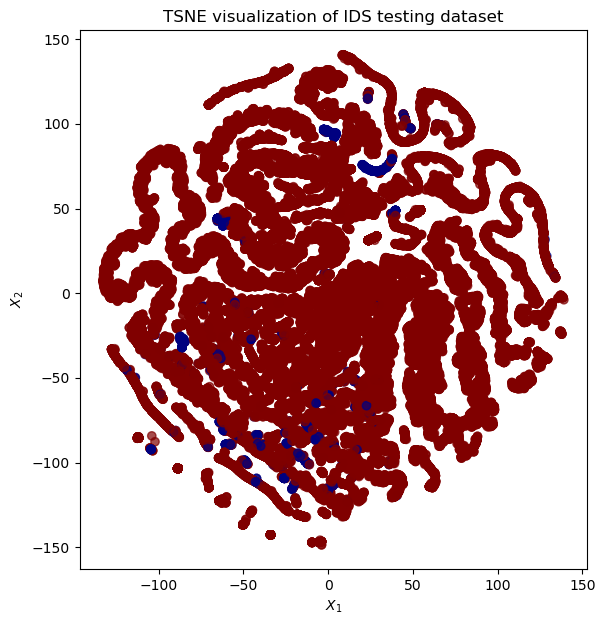

In [6]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

transform = TSNE
X = X_test

trans = transform(n_components=2)
X_reduced = trans.fit_transform(X)

Y = pd.DataFrame(Y_test)
fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(
    X_reduced[:, 0], 
    X_reduced[:, 1], 
    c=Y[0].astype('category').cat.codes, 
    cmap='jet',
    alpha=0.7
)

ax.set(
    aspect='equal',
    xlabel='$X_1$',
    ylabel='$X_2$',
    title=f'{transform.__name__} visualization of IDS testing dataset'
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)
cv = KFold(n_splits=10, random_state=0, shuffle=True)

accuracy = clf.score(X_test, Y_test)
KFold10_accuracy = cross_val_score(clf, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(KFold10_accuracy.mean())

predict = clf.predict(X_test)
cm = confusion_matrix(Y_test, predict)
precision = precision_score(Y_test, predict, average='weighted', labels=np.unique(predict))
recall = recall_score(Y_test, predict, average='weighted', labels=np.unique(predict))
f1scoremacro = f1_score(Y_test, predict, average='macro', labels=np.unique(predict))
print(classification_report(Y_test, predict, target_names=['Normal', 'Attacks']))

In [7]:
# Calculate false alert rate
false_alert_rate = cm[0][1] / (cm[0][1] + cm[0][0])
print(f"False alert rate: {false_alert_rate}")

False alert rate: 0.02736098852603707


In [8]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

path_test = r"/home/benjamin/Documents/Ensicaen/3A_riga/Cours/Telecom-software/Task 5/labeled_flows_xml"

# Step 2: Load and Combine XML Files
required_columns = ['totalSourceBytes', 'totalDestinationBytes', 'totalDestinationPackets',
                    'totalSourcePackets', 'sourcePort', 'destinationPort', 'Tag']
dataframes = []

for file in os.listdir(path_test):
    full_path = os.path.join(path_test, file)

    # Skip empty files
    if os.path.getsize(full_path) == 0:
        print(f"Skipping empty file: {full_path}")
        continue

    try:
        # Attempt to read the XML file
        df = pd.read_xml(full_path)
        print(f"Successfully read file: {full_path}")
    except Exception as e:
        # Log the error and skip to the next file
        print(f"Error reading file {full_path}: {e}")
        continue

    # Proceed with analysis only if 'df' is successfully created
    if 'appName' in df.columns:
        app_count = pd.value_counts(df['appName'])
    else:
        print(f"'appName' column missing in file: {full_path}")
        continue

    # Proceed with the rest of the code, checking required columns
    if 'Tag' not in df.columns:
        print(f"'Tag' column missing in file: {full_path}")
        continue

if len(dataframes) == 0:
  print("No files processed or all files were empty!")
else:
  # Combine all data into one DataFrame
  df_test = pd.concat(dataframes, ignore_index=True)
  # ... rest of your code ...
# Step 3: Separate Features and Labels
features = ['totalSourceBytes', 'totalDestinationBytes', 'totalDestinationPackets',
            'totalSourcePackets', 'sourcePort', 'destinationPort']
df_test[features] = df_test[features].astype('int64')  # Convert features to integers

x = df_test[features]
y = df_test['Tag']

# Step 4: Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Step 5: Balance the Data Using SMOTE
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Step 6: Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, class_weight='balanced')
rf.fit(x_train_balanced, y_train_balanced)

# Step 7: Cross-Validation Evaluation
cv = KFold(n_splits=10, random_state=42, shuffle=True)
rf_cv_accuracy = cross_val_score(rf, x_train_balanced, y_train_balanced, scoring='accuracy', cv=cv, n_jobs=-1)
print(f"10-Fold CV Accuracy for Random Forest: {rf_cv_accuracy.mean():.4f}")

# Step 8: Evaluate the Model
y_pred = rf.predict(x_test)

# Metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
recall = recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
f1_macro = f1_score(y_test, y_pred, average='macro', labels=np.unique(y_pred))

print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score (Macro): {f1_macro:.4f}")

# Step 9: Minimize False Alert Rate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
false_alert_rate = fp / (fp + tn)
print(f"False Alert Rate: {false_alert_rate:.4f}")

Error reading file /home/benjamin/Documents/Ensicaen/3A_riga/Cours/Telecom-software/Task 5/labeled_flows_xml/TestbedWedJun16-3Flows.xml: Document is empty, line 1, column 1 (<string>, line 1)
Successfully read file: /home/benjamin/Documents/Ensicaen/3A_riga/Cours/Telecom-software/Task 5/labeled_flows_xml/TestbedMonJun14Flows.xml


/tmp/ipykernel_36185/1079456513.py:34: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  app_count = pd.value_counts(df['appName'])


Error reading file /home/benjamin/Documents/Ensicaen/3A_riga/Cours/Telecom-software/Task 5/labeled_flows_xml/TestbedThuJun17-2Flows.xml: Document is empty, line 1, column 1 (<string>, line 1)
Error reading file /home/benjamin/Documents/Ensicaen/3A_riga/Cours/Telecom-software/Task 5/labeled_flows_xml/TestbedWedJun16-1Flows.xml: Document is empty, line 1, column 1 (<string>, line 1)
Error reading file /home/benjamin/Documents/Ensicaen/3A_riga/Cours/Telecom-software/Task 5/labeled_flows_xml/TestbedSunJun13Flows.xml: Document is empty, line 1, column 1 (<string>, line 1)
Error reading file /home/benjamin/Documents/Ensicaen/3A_riga/Cours/Telecom-software/Task 5/labeled_flows_xml/TestbedThuJun17-1Flows.xml: Document is empty, line 1, column 1 (<string>, line 1)
Error reading file /home/benjamin/Documents/Ensicaen/3A_riga/Cours/Telecom-software/Task 5/labeled_flows_xml/TestbedThuJun17-3Flows.xml: Document is empty, line 1, column 1 (<string>, line 1)
Error reading file /home/benjamin/Document

NameError: name 'df_test' is not defined